In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [45]:

# 1.Read the Data
df = pd.read_csv('obesity_data.csv')
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [ ]:
df.describe()

,Age,Height,Weight,BMI,PhysicalActivityLevel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,170.052417,71.205769,24.888317,2.534000
std,18.114267,10.309971,15.509849,6.193912,1.116284
min,18.000000,136.115719,26.065730,8.470572,1.000000
25%,35.000000,163.514205,61.129629,20.918068,2.000000
50%,50.000000,169.801665,71.929072,24.698647,3.000000
75%,66.000000,177.353596,81.133746,28.732132,4.000000
max,79.000000,201.419670,118.907366,50.791898,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


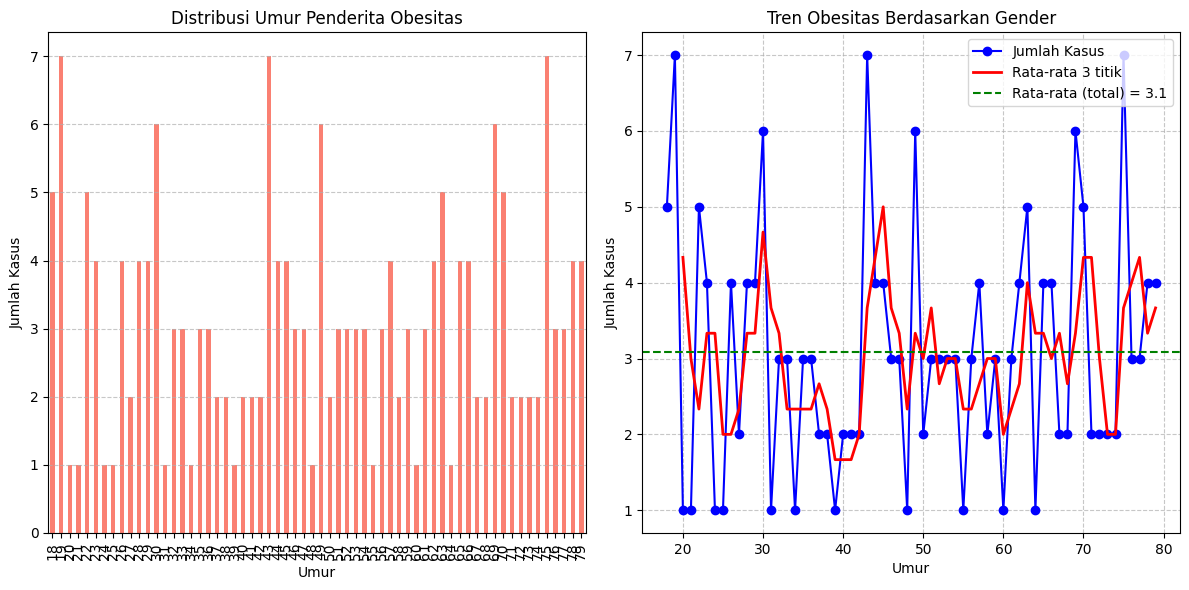

In [46]:
# 1. Filter hanya data obesitas
obese_data = df[df['ObesityCategory'] == 'Obese']

# 2. Hitung rata-rata usia untuk kategori obesitas
average_age_obese = obese_data['Age'].mean()

# 3. Hitung distribusi usia penderita obesitas
age_distribution = obese_data['Age'].value_counts().sort_index()

# 4. Buat visualisasi
plt.figure(figsize=(12, 6))

# Grafik batang distribusi usia
plt.subplot(1, 2, 1)
age_distribution.plot(kind='bar', color='salmon')
plt.title('Distribusi Umur Penderita Obesitas')
plt.xlabel('Umur')
plt.ylabel('Jumlah Kasus')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Grafik garis tren
plt.subplot(1, 2, 2)
# Hitung moving average untuk memperhalus garis
window_size = 3
moving_avg = age_distribution.rolling(window=window_size).mean()

age_distribution.plot(kind='line', color='blue', marker='o', label='Jumlah Kasus')
moving_avg.plot(kind='line', color='red', linewidth=2, label=f'Rata-rata {window_size} titik')
plt.axhline(y=age_distribution.mean(), color='green', linestyle='--',
            label=f'Rata-rata (total) = {age_distribution.mean():.1f}')
plt.title('Tren Obesitas Berdasarkan Gender')
plt.xlabel('Umur')
plt.ylabel('Jumlah Kasus')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)

plt.tight_layout()


plt.show()

In [47]:

# 2.preprocessing data
X = df.drop(['ObesityCategory'], axis=1)
y = df["ObesityCategory"]

# Bagi data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definisikan kolom numerik dan kategorikal
numeric_features = ['Age', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']
categorical_features = ['Gender']

# Buat transformer untuk preprocessing
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Gabungkan preprocessing untuk kolom numerik dan kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 3. Bangun Model Pipeline
svm_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', C=1.0, random_state=42))
])

# 4. Training Model
svm_model.fit(X_train, y_train)

# 5. Evaluasi Model
y_pred = svm_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[108   0   6   0]
 [  0  48   2   0]
 [  2   4  85   0]
 [  3   0   0  42]]

Classification Report:
               precision    recall  f1-score   support

Normal weight       0.96      0.95      0.95       114
        Obese       0.92      0.96      0.94        50
   Overweight       0.91      0.93      0.92        91
  Underweight       1.00      0.93      0.97        45

     accuracy                           0.94       300
    macro avg       0.95      0.94      0.95       300
 weighted avg       0.94      0.94      0.94       300



In [48]:

#safe model
from joblib import dump, load

model = dump(svm_model, 'obesity_model.pkl')

model_loaded = load('obesity_model.pkl')

In [49]:
# Input dari user
Age = int(input('Enter your age: '))
Gender = str(input('Enter your gender (Male/Female): '))
Height = float(input('Enter your height (in cm): '))
Weight = float(input('Enter your weight (in kg): '))
BMI = float(input('Enter your BMI: '))
PhysicalActivityLevel = float(input("Enter your PhysicalActivityLevel (1-4): "))

# Membuat dataframe
input_data = pd.DataFrame({
    'Age': [Age],
    'Gender': [Gender],
    'Height': [Height],
    'Weight': [Weight],
    'BMI': [BMI],
    'PhysicalActivityLevel': [PhysicalActivityLevel]
})

# Melakukan prediksi
predict = model_loaded.predict(input_data)

print(f"Your obesity level is: {predict[0]}")

Enter your age: 15
Enter your gender (Male/Female): Male
Enter your height (in cm): 185
Enter your weight (in kg): 60
Enter your BMI: 22
Enter your PhysicalActivityLevel (1-4): 3
Your obesity level is: Normal weight


Decision tress testing

In [29]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('obesity_data.csv')
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [ ]:
# Encode 'Gender' (Male: 1, Female: 0)
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

# Encode target 'ObesityCategory' (Normal weight: 0, Overweight: 1, Obese: 2)
y = LabelEncoder().fit_transform(df['ObesityCategory'])

# Pisahkan fitur (X) dan target (y)
X = df.drop('ObesityCategory', axis=1) # Semua kolom kecuali target

In [30]:
# build a model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier(
    max_depth=30,
    min_samples_split=10,
    min_samples_leaf=2,
    criterion="gini",
    max_features="log2",
    random_state=42
)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, max_features='log2', min_samples_leaf=2,
                       min_samples_split=10, random_state=42)

In [40]:
from sklearn.metrics import accuracy_score

# Prediksi (contoh: prediksi data training sendiri)
y_pred = model.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.2f}")

Akurasi: 0.98


In [28]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [2, 3, 4], 'min_samples_split': [2, 5]}
grid = GridSearchCV(model, params, cv=5)
grid.fit(X, y)
print(f"Parameter terbaik: {grid.best_params_}")

Parameter terbaik: {'max_depth': 4, 'min_samples_split': 2}


In [ ]:
importance = model.feature_importances_
for col, imp in zip(X.columns, importance):
    print(f"{col}: {imp:.2f}")

Age: 0.00
Gender: 0.00
Height: 0.11
Weight: 0.25
BMI: 0.64
PhysicalActivityLevel: 0.00


In [42]:
# Input dari user
Age = int(input('Enter your age: '))
Gender = str(input('Enter your gender (Male/Female): '))
Height = float(input('Enter your height (in cm): '))
Weight = float(input('Enter your weight (in kg): '))
BMI = float(input('Enter your BMI: '))
PhysicalActivityLevel = float(input("Enter your PhysicalActivityLevel (1-4): "))

# Membuat dataframe
input_data = pd.DataFrame({
    'Age': [Age],
    'Gender': [Gender],
    'Height': [Height],
    'Weight': [Weight],
    'BMI': [BMI],
    'PhysicalActivityLevel': [PhysicalActivityLevel]
})

input_data['Gender'] = LabelEncoder().fit_transform(input_data['Gender'])

# Melakukan prediksi
predict = model.predict(input_data)

print(f"Your obesity level is: {predict}")
# (Normal weight: 0, Overweight: 1, Obese: 2)

Enter your age: 15
Enter your gender (Male/Female): Male
Enter your height (in cm): 185
Enter your weight (in kg): 60
Enter your BMI: 22
Enter your PhysicalActivityLevel (1-4): 3
Your obesity level is: [3]
